In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(12)
means = [[0, 3], [2, 0]]
cov1 = [[1, 0.3], [0.3, 1]]
cov2 = [[1, 0.2], [0.2, 1.5]]
N1 = 50
N2 = 40
N = N1 + N2
X1 = np.random.multivariate_normal(means[0], cov1, N1) # each row is a data point
X2 = np.random.multivariate_normal(means[1], cov2, N2)
# Combine classes and create labels
X = np.vstack((X1, X2))
y = np.hstack((np. ones(50), 2*np.ones(40)))

Number of samples in Class 1: 50
Number of samples in Class 2: 40
Mean of Class 1: [0.2041277  3.04666639]
Mean of Class 2: [ 1.80478915 -0.18249896]


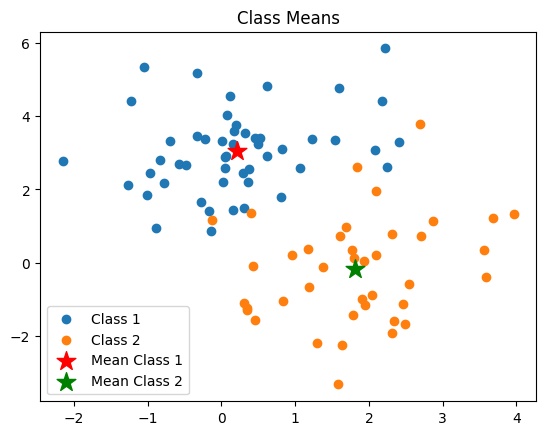

In [8]:
# Separate data by class to class1 (y=0) and class2 (y=1)
class1 = X[y == 1]
class2 = X[y == 2]
print("Number of samples in Class 1:", class1.shape[0])
print("Number of samples in Class 2:", class2.shape[0])
# Calculate class means
mean1 = np.mean(class1, axis=0)
mean2 = np.mean(class2, axis=0)
print("Mean of Class 1:", mean1)
print("Mean of Class 2:", mean2)
# Visualize class means
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.scatter(mean1[0], mean1[1], color='red', s=200, marker='*', label='Mean Class 1')
plt.scatter(mean2[0], mean2[1], color='green', s=200, marker='*', label='Mean Class 2')
plt.legend()
plt.title('Class Means')
plt.show()

In [9]:
# Build S_B
m1 = np.mean(X1.T, axis = 1, keepdims = True)
m2 = np.mean(X2.T, axis = 1, keepdims = True)
a = (m2 - m1)
S_B = a.dot(a.T)
# Build S_W
SW1 = X1.T - np.tile(m1, (1, N1))
SW2 = X2.T - np.tile(m2, (1, N2))
S_W = SW1.dot(SW1.T) + SW2.dot(SW2.T)
print('Between-class covariance matrix: S_B =\n', S_B)
print('Within-class covariance matrix: S_W =\n',S_W)

Between-class covariance matrix: S_B =
 [[ 2.56211707 -5.16880049]
 [-5.16880049 10.42750887]]
Within-class covariance matrix: S_W =
 [[ 86.83642101  27.51782236]
 [ 27.51782236 140.23997255]]


In [13]:
L, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
id = np.argmax(L)
print(W.shape)
w = W[:, id]
print(w)
print(w.shape)

(2, 2)
[ 0.69467319 -0.71932549]
(2,)


(50,) (2,)
(2, 50) (2, 40)


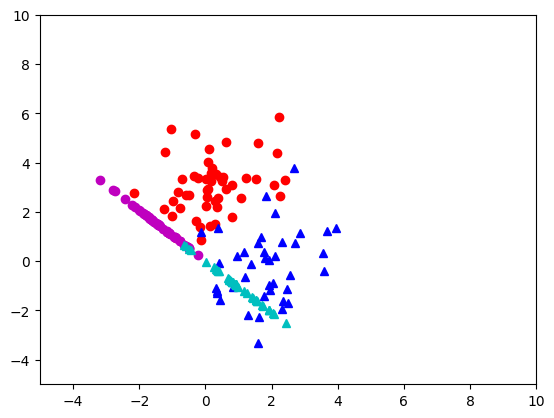

In [14]:
# Visualize data
plt.plot(X1[:, 0], X1[:, 1], 'ro')
plt.plot(X2[:, 0], X2[:, 1], 'b^')
plt.axis([-5, 10, -5, 10])
#Compute projections of data points on to LDA's dimention
#
norm_W = w.T.dot(w)
X1_tmp = X1.dot(w)/norm_W
X2_tmp = X2.dot(w)/norm_W
print(X1_tmp.shape, w.shape)
X1_p = np.multiply(w.reshape(2,1), X1_tmp.T)
X2_p = np.multiply(w.reshape(2,1), X2_tmp.T)
print(X1_p.shape,X2_p.shape)
#Draw projected points
plt.plot(X1_p[0, :], X1_p[1, :], 'mo')
plt.plot(X2_p[0, :], X2_p[1, :], 'c^')
plt.show()

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)